In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
sampodataset=pd.read_csv(r"C:\Users\sridhar_marri\Downloads\sales-of-shampoo-over-a-three-ye.csv")

In [156]:
sampodataset.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [157]:
sampodataset.tail()

,Month,Sales of shampoo over a three year period
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9
36,Sales of shampoo over a three year period,NaN


In [158]:
#dropping the last row beacuse its has invalid data

sampodataset = sampodataset.iloc[0:sampodataset.shape[0]-1,:]

In [159]:
sampodataset.tail()

,Month,Sales of shampoo over a three year period
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [160]:
sampodataset.Month="190"+sampodataset.Month

In [161]:
sampodataset.head()

,Month,Sales of shampoo over a three year period
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3


In [162]:
sampodataset.tail()

,Month,Sales of shampoo over a three year period
31,1903-08,407.6
32,1903-09,682.0
33,1903-10,475.3
34,1903-11,581.3
35,1903-12,646.9


In [163]:
sampodataset.Month[1]

'1901-02'

#### 1901-02 displaying in '' means its a string we need to change Month column data as Date data type

In [164]:
sampodataset.Month = pd.to_datetime(sampodataset.Month,format ='%Y-%m')
sampodataset.head()

,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [165]:
sampodataset.Month[1]

Timestamp('1901-02-01 00:00:00')

#### now its converted into date data type

#### now change the name of "Sales of shampoo over a three year period" to "ShampooSales"

In [166]:
sampodataset.rename(columns={'Sales of shampoo over a three year period': 'ShampooSales'},inplace = True)
sampodataset.head()


,Month,ShampooSales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


#### Make the Month column as index column

In [167]:
sampodataset.set_index('Month',inplace=True)

In [168]:
sampodataset.head()

,ShampooSales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [169]:
sampodataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ShampooSales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


#### Step 2: Visualize the Data
######  Let's visualize this data with a few methods.

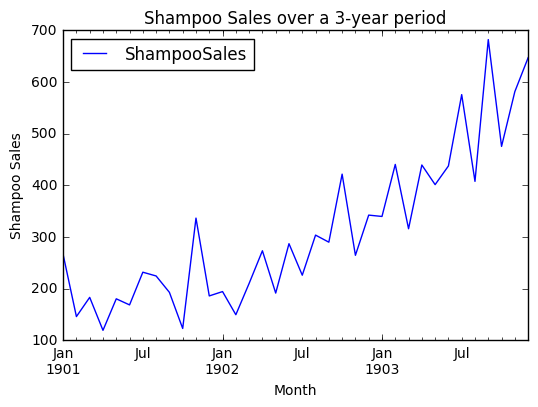

In [170]:
sampodataset.plot()
plt.title('Shampoo Sales over a 3-year period')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')


In [171]:
sampodataset.head()

,ShampooSales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [172]:
timeseries = sampodataset['ShampooSales']

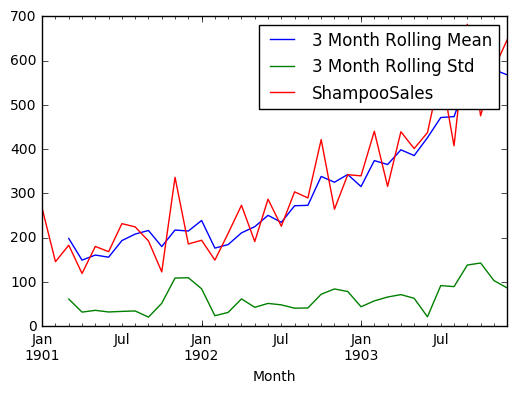

In [175]:
timeseries.rolling(3).mean().plot(label='3 Month Rolling Mean')
timeseries.rolling(3).std().plot(label='3 Month Rolling Std')
timeseries.plot()
plt.legend()

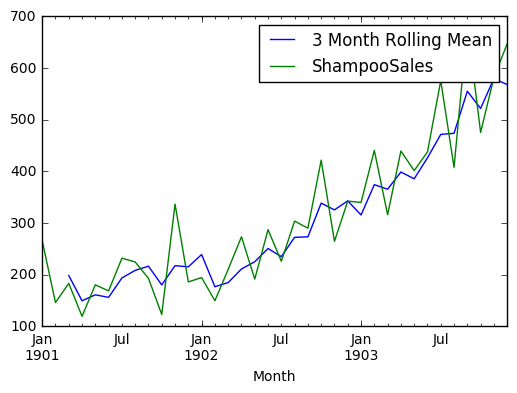

In [177]:
timeseries.rolling(3).mean().plot(label='3 Month Rolling Mean')
timeseries.plot()
plt.legend()

#### Decomposition
##### ETS decomposition allows us to see the individual parts!

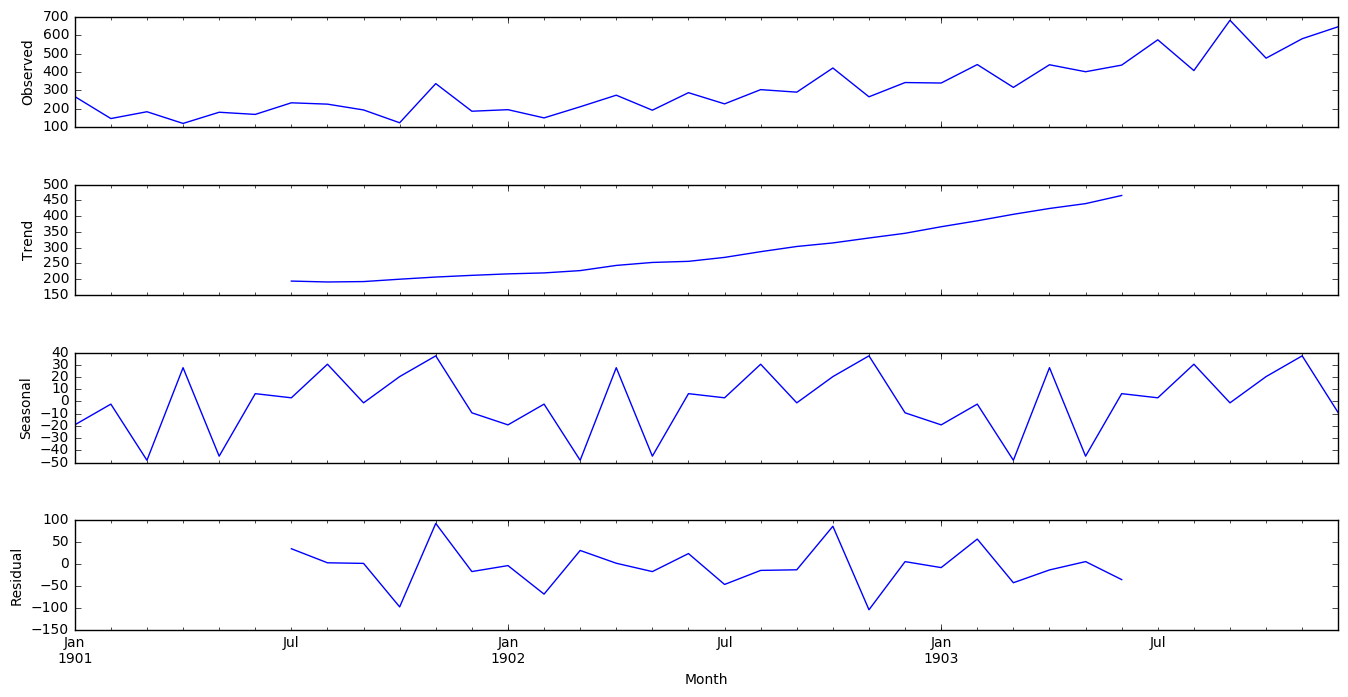

In [178]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sampodataset['ShampooSales'])  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

#### Checking the statinarity using adafuller

In [179]:
from statsmodels.tsa.stattools import adfuller

In [180]:
result = adfuller(sampodataset['ShampooSales'])

In [181]:
result

(3.0601420836411815,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '10%': -2.6328003999999998, '5%': -2.98648896},
 278.9972644263031)

In [182]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.06014208364
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [183]:
def adf_check(time_series):
    adfuller_result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(adfuller_result, labels):
        print(label + ": " + str(value))
    return adfuller_result

In [184]:
def find_stationarity_and_difference(time_series):
    
    for i in range(0,10):
        
        if(i==0):
            print('Actual Time Series')
        else:
            print(str(i)+'-Differenced Time Series')
            
        print('-' * 60)

        p_stationarity = adf_check(time_series)[1]   
        
        print("\nStationarity:")
        
        if(p_stationarity <= 0.05):
            print('Data is Stationary')
            break
        else:
            print('Data is Non-Stationary\n')
            time_series = (time_series - time_series.shift(1))
            time_series.dropna(inplace = True)
    return i, time_series

In [185]:
d,stationary_series = find_stationarity_and_difference(sampodataset['ShampooSales'])

Actual Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: 3.06014208364
p-value: 1.0
#Lags Used: 10
Number of Observations Used: 25

Stationarity:
Data is Non-Stationary

1-Differenced Time Series
------------------------------------------------------------
Augmented Dickey-Fuller Test:
ADF Test Statistic: -7.24907405555
p-value: 1.79985741417e-10
#Lags Used: 1
Number of Observations Used: 33

Stationarity:
Data is Stationary


In [186]:
stationary_series

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Name: ShampooSales, dtype: float64

No.of times differenced =  1


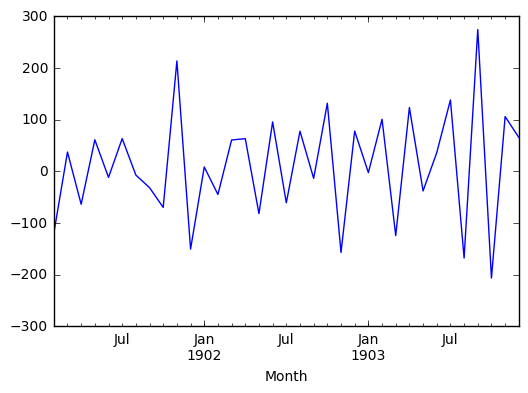

In [187]:
print('No.of times differenced = ', d)
stationary_series.plot()

#### Plotting Autocorrelation and Partial Autocorrelation Plots
#### Autocorrelation Plot using Pandas

In [188]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [189]:
from pandas.tools.plotting import autocorrelation_plot

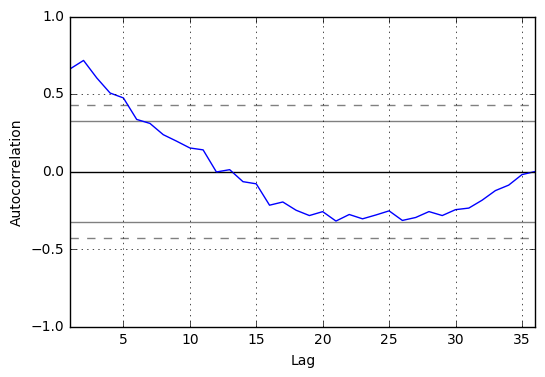

In [191]:
autocorrelation_plot(sampodataset['ShampooSales'])

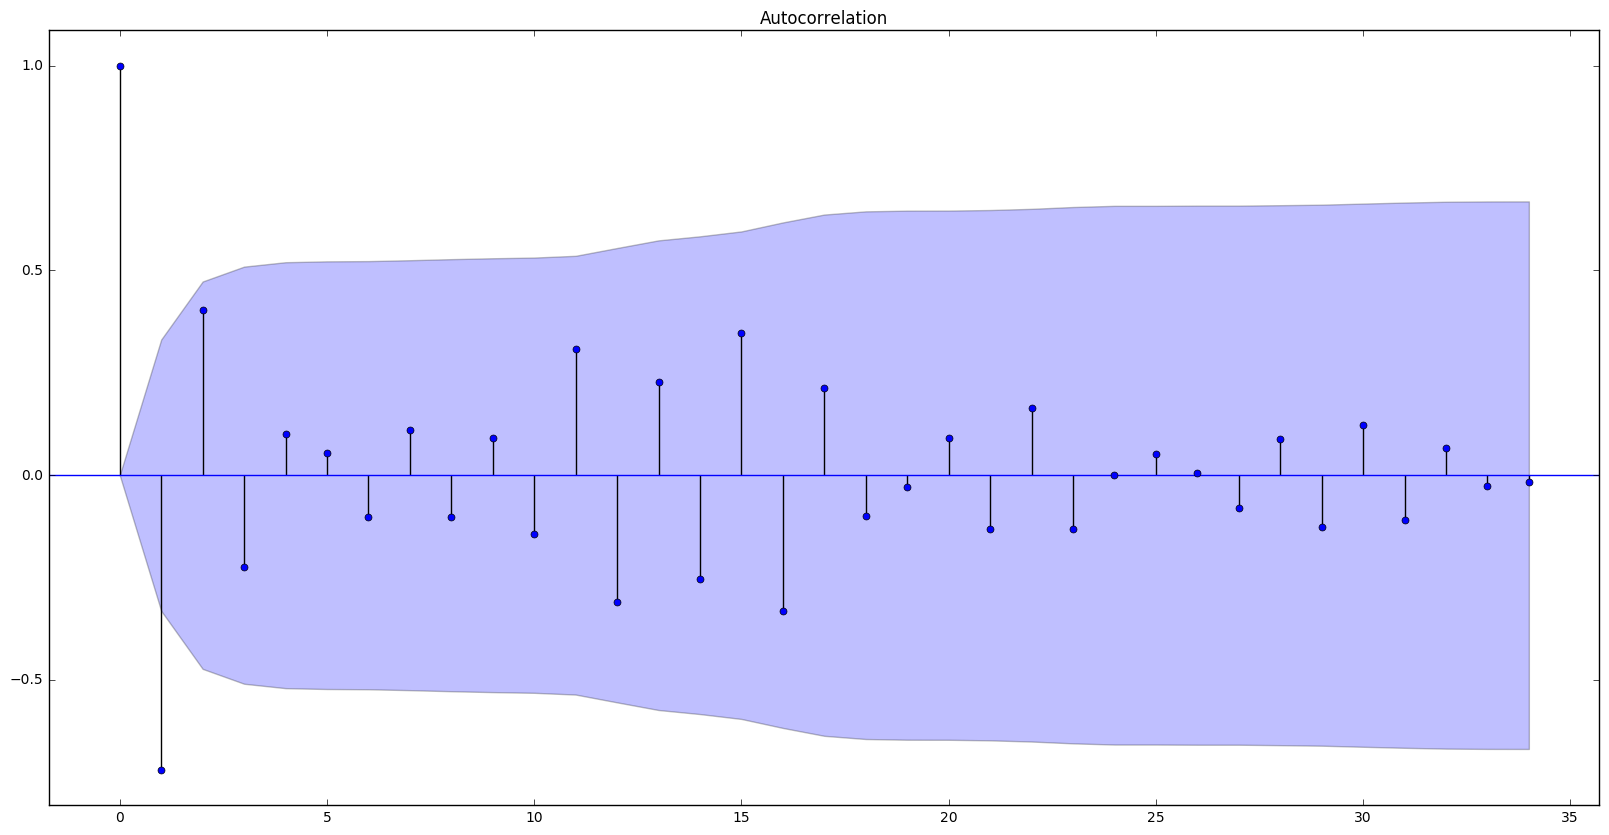

In [192]:
fig_first = plot_acf(stationary_series)
fig_first.set_size_inches(20,10)

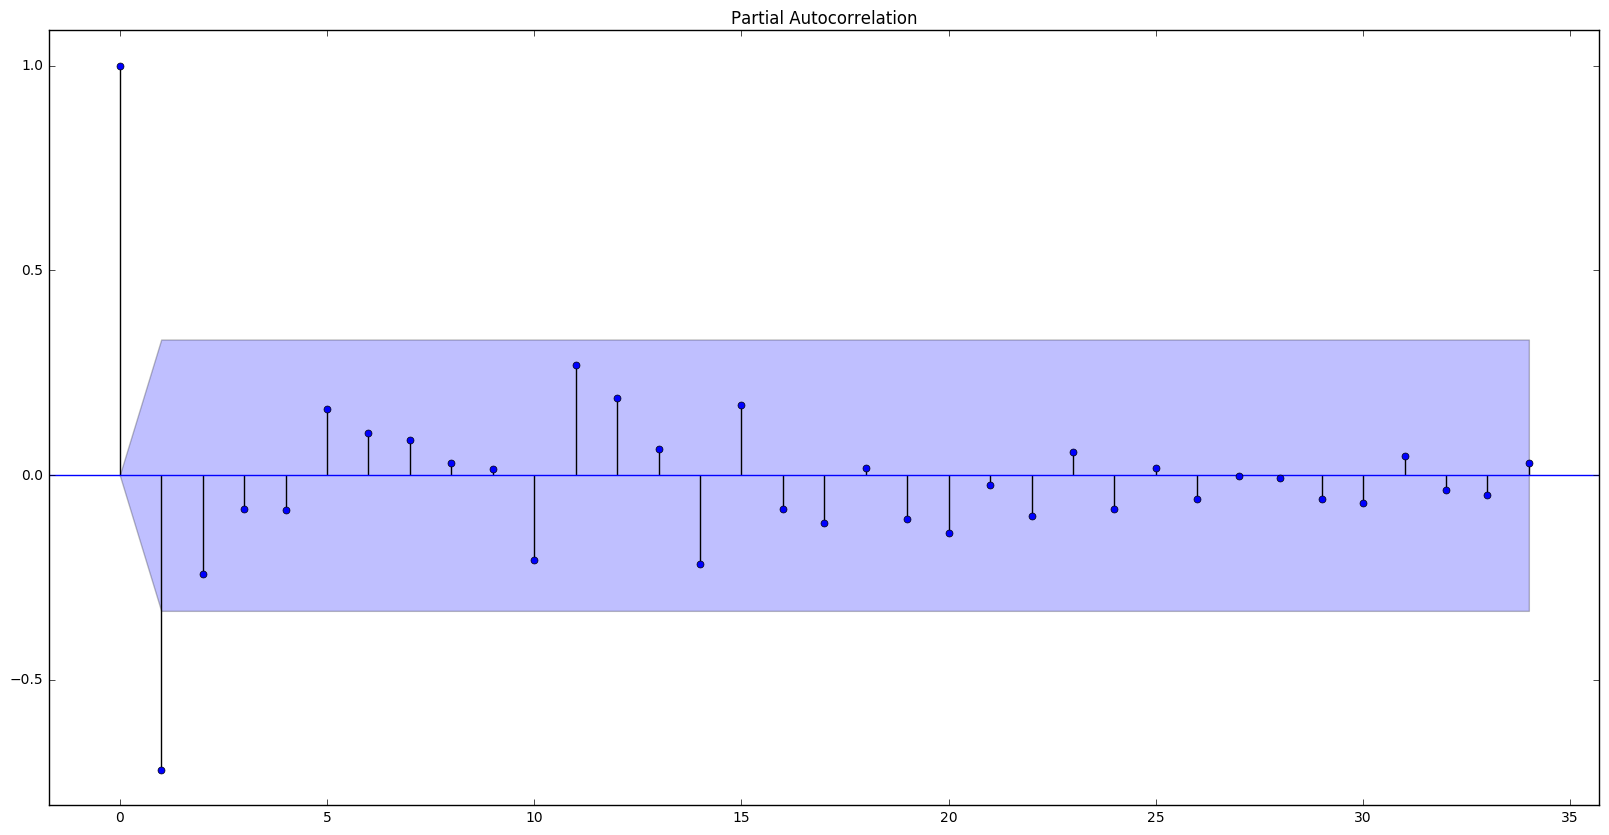

In [193]:
result = plot_pacf(stationary_series)
#fig_first_pacf = plot_pacf(stationary_series)
result.set_size_inches(20,10)

In [194]:
stationary_series

Month
1901-02-01   -120.1
1901-03-01     37.2
1901-04-01    -63.8
1901-05-01     61.0
1901-06-01    -11.8
1901-07-01     63.3
1901-08-01     -7.3
1901-09-01    -31.7
1901-10-01    -69.9
1901-11-01    213.6
1901-12-01   -150.6
1902-01-01      8.4
1902-02-01    -44.8
1902-03-01     60.6
1902-04-01     63.2
1902-05-01    -81.9
1902-06-01     95.6
1902-07-01    -61.0
1902-08-01     77.6
1902-09-01    -13.7
1902-10-01    131.7
1902-11-01   -157.1
1902-12-01     77.8
1903-01-01     -2.6
1903-02-01    100.7
1903-03-01   -124.5
1903-04-01    123.4
1903-05-01    -38.0
1903-06-01     36.1
1903-07-01    138.1
1903-08-01   -167.9
1903-09-01    274.4
1903-10-01   -206.7
1903-11-01    106.0
1903-12-01     65.6
Name: ShampooSales, dtype: float64

In [195]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sampodataset['ShampooSales'],order =(4,1,2)) 
arima_results = model.fit()
print(arima_results.summary())


                             ARIMA Model Results                              
Dep. Variable:         D.ShampooSales   No. Observations:                   35
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -192.115
Method:                       css-mle   S.D. of innovations             53.288
Date:                Tue, 23 Oct 2018   AIC                            400.231
Time:                        00:43:54   BIC                            412.674
Sample:                    02-01-1901   HQIC                           404.526
                         - 12-01-1903                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                   12.2700      3.163      3.880      0.001         6.071    18.469
ar.L1.D.ShampooSales    -0.4734      0.216     -2.191      0.037        -0.897    -0.050
ar.L2.D.Sham

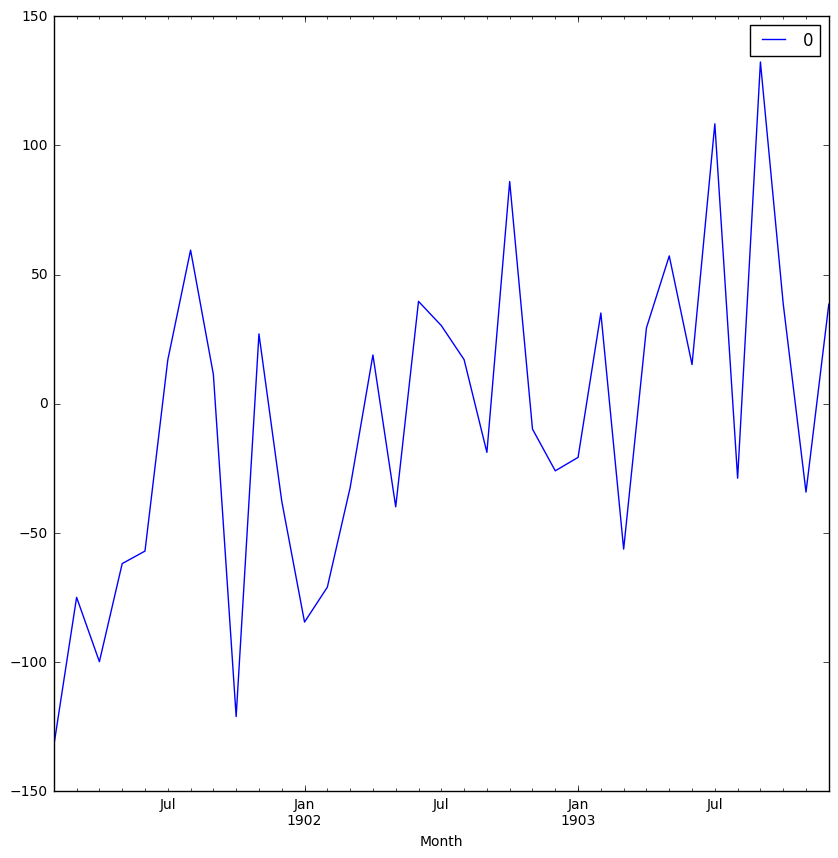

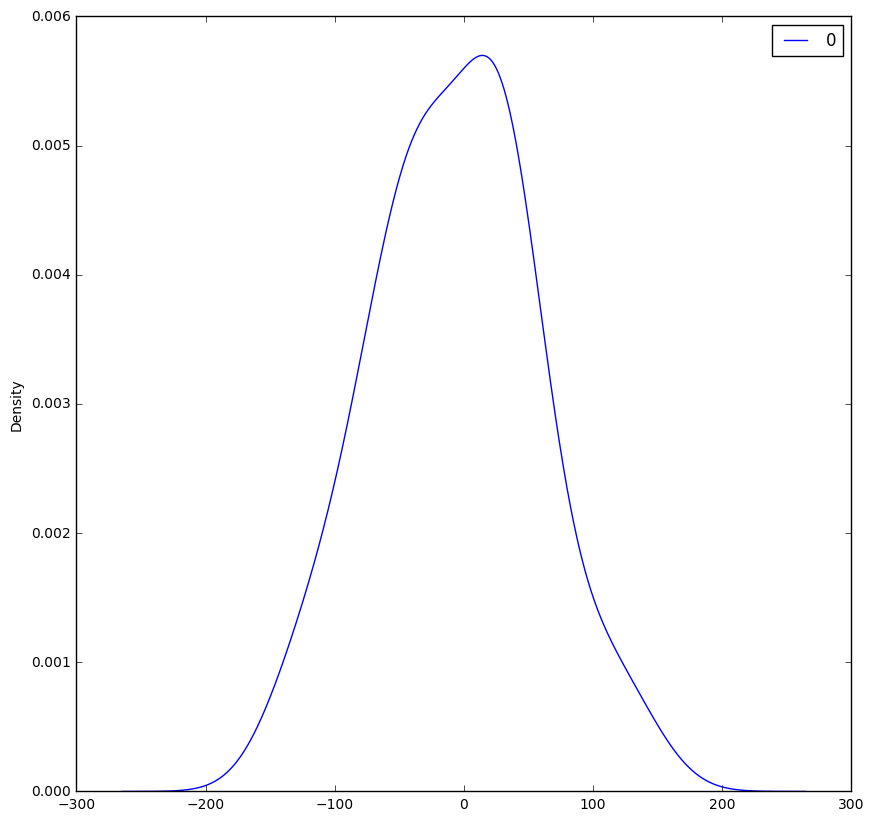

In [196]:
residuals = pd.DataFrame(arima_results.resid)
residuals.plot(figsize=(10,10))
residuals.plot(kind='kde',figsize=(10,10) )

In [197]:
residuals.describe()

,0
count,35.000000
mean,-7.005598
std,61.631847
min,-132.370036
25%,-48.066197
50%,-9.784078
75%,32.706353
max,132.329455


In [198]:
arima_results.aic

400.2307795387187

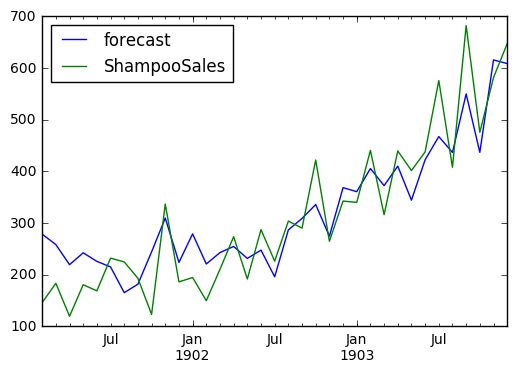

In [199]:
predicted_plot = arima_results.plot_predict()

predicted=363.439884, expected=342.300000
predicted=363.439884, expected=339.700000
predicted=363.439884, expected=440.400000
predicted=363.439884, expected=315.900000
predicted=363.439884, expected=439.300000
predicted=363.439884, expected=401.300000
predicted=363.439884, expected=437.400000
predicted=363.439884, expected=575.500000
predicted=363.439884, expected=407.600000
predicted=363.439884, expected=682.000000
predicted=363.439884, expected=475.300000
predicted=363.439884, expected=581.300000
predicted=363.439884, expected=646.900000

 Test RMSE: 23890.548

 Test MSE: 23890.548

 Model aic score 254.94344407478465 
 Model bic score 263.671783702


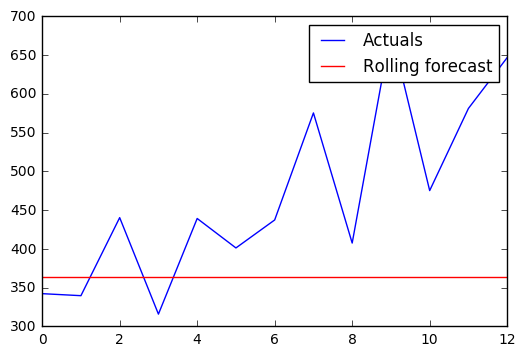

In [203]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X =sampodataset['ShampooSales'].values 
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(train, order=(4,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

RMSE= sqrt(mean_squared_error(test, predictions))
MSE = mean_squared_error(test, predictions)

print('\n Test RMSE: %.3f' % error)
print('\n Test MSE: %.3f' % error)

print ("\n Model aic score",model_fit.aic, "\n Model bic score", model_fit.bic)

# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()


#### There is a problem with our forecast, as our rolling forecast is just a horizontal straight line. Therefore, try various values of p,q and select the model which gives the lowest AIC scorem

In [208]:
import warnings
warnings.filterwarnings('ignore')
ararray = X
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))        

(0, 1, 0) 430.873111876
(0, 1, 1) 409.0126622411773
(1, 1, 0) 406.02228959235015
(1, 1, 1) 402.4666524180001
(1, 1, 2) 401.5247943798089
(1, 1, 3) 403.5241728749753
(2, 1, 0) 403.627564116764
(2, 1, 1) 404.28621423318384
(3, 1, 0) 404.6924591816536
(3, 1, 1) 406.1395443929499
(4, 1, 0) 404.7867685567654
(4, 1, 1) 406.5796403612047
(4, 1, 2) 400.2307795387187
(4, 1, 3) 400.65677258688265
(5, 1, 0) 406.33987702442084
(5, 1, 1) 408.78589340807525
(5, 1, 2) 400.7258210619167
(5, 1, 3) 402.4996309749031
Best Model is : (4, 1, 2)


#### The model gives error for the values (4,1,2) and other values of p,d,q chosen by lower aic score. But works for (p,d,q) = (5,1,0)

predicted=349.117682, expected=342.300000
predicted=306.512965, expected=339.700000
predicted=387.376428, expected=440.400000
predicted=348.154216, expected=315.900000
predicted=386.308878, expected=439.300000
predicted=356.082039, expected=401.300000
predicted=446.379508, expected=437.400000
predicted=394.737270, expected=575.500000
predicted=434.915449, expected=407.600000
predicted=507.923469, expected=682.000000
predicted=435.482942, expected=475.300000
predicted=652.743750, expected=581.300000
predicted=546.343487, expected=646.900000
Test MSE: 6958.323


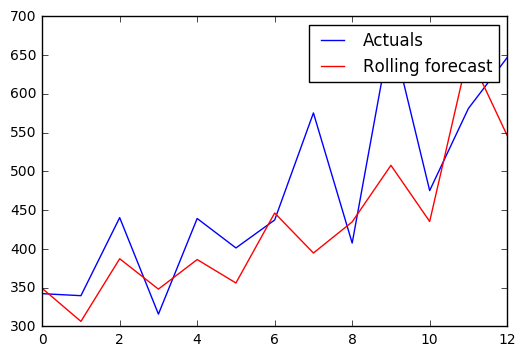

In [237]:
X = sampodataset['ShampooSales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()
    #sampodataset['Forecast']=output[0]
    yhat = output[0]
    
    predictions.append(yhat)
   
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
#sampodataset['Forecast']=predictions
# plot
plt.plot(test,color='blue', label='Actuals')
plt.plot(predictions, color='red', label='Rolling forecast' )
plt.legend()
plt.show()

In [211]:
print('The model has the parameters: (p,d,q) = (5,1,0). Its an autoregressive model')

The model has the parameters: (p,d,q) = (5,1,0). Its an autoregressive model
